<a href="https://colab.research.google.com/github/Jhonald73/TPproj_github/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"Hello World!"

In [14]:
import pandas as pd
# Example: Replace this with the raw URL of your GitHub file
github_raw_url = 'https://raw.githubusercontent.com/Jhonald73/TPproj_github/main/laptop_prices_2024_sgd_TL.csv'
try:
    df = pd.read_csv(github_raw_url)
    print("Successfully loaded data from GitHub!")
    display(df.head())
except Exception as e:
    print(f"Error loading data: {e}")
    print("Please ensure the URL is correct and the file format is compatible with `pd.read_csv`.")

Successfully loaded data from GitHub!


,Brand,Model,CPU,GPU,RAM_GB,Storage_Type,Storage_GB,Touchscreen,Weight_kg,Screen_Size_inch,Discount_percent,Price_SGD,Brand_Discount,Member_Discount
0,Acer,Aspire 5,Intel i9-14900HK,NVIDIA RTX 4070,64,SSD,256,False,1.56,16.0,3.27,2413.36,5,144.80
1,Acer,Nitro 5,AMD Ryzen 9 8900HX,AMD Radeon 780M,32,SSD,1024,True,1.45,14.0,5.03,1773.75,5,124.16
2,Acer,Nitro 5,AMD Ryzen 5 8600H,NVIDIA RTX 4050,32,SSD,2048,False,1.34,14.0,4.41,1634.07,5,98.04
3,Acer,TravelMate P6,Intel Core Ultra 7 15500H,NVIDIA RTX 4060,16,SSD,4096,True,1.18,13.3,2.16,2362.59,5,118.13
4,Acer,Predator Helios 300,Intel i7-14800H,NVIDIA RTX 4070,8,SSD,1024,True,1.31,14.0,6.93,2218.55,5,155.30


In [15]:
for column in df.columns:
    print(column)

Brand
Model
CPU
GPU
RAM_GB
Storage_Type
Storage_GB
Touchscreen
Weight_kg
Screen_Size_inch
Discount_percent
Price_SGD
Brand_Discount
Member_Discount


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Model             1000 non-null   object 
 2   CPU               1000 non-null   object 
 3   GPU               1000 non-null   object 
 4   RAM_GB            1000 non-null   int64  
 5   Storage_Type      1000 non-null   object 
 6   Storage_GB        1000 non-null   int64  
 7   Touchscreen       1000 non-null   bool   
 8   Weight_kg         1000 non-null   float64
 9   Screen_Size_inch  1000 non-null   float64
 10  Discount_percent  1000 non-null   float64
 11  Price_SGD         1000 non-null   float64
 12  Brand_Discount    1000 non-null   int64  
 13  Member_Discount   1000 non-null   float64
dtypes: bool(1), float64(5), int64(3), object(5)
memory usage: 102.7+ KB


In [17]:
df.shape

(1000, 14)

In [18]:
df.isnull().sum() # NO missing value or null value

,0
Brand,0
Model,0
CPU,0
GPU,0
RAM_GB,0
Storage_Type,0
Storage_GB,0
Touchscreen,0
Weight_kg,0
Screen_Size_inch,0


In [19]:
df.duplicated().sum() # NO duplicated value

np.int64(0)

In [20]:
from sklearn.preprocessing import OneHotEncoder
df["Touchscreen"] = OneHotEncoder().fit_transform(df[["Touchscreen"]]).toarray()  # One-hot encoding for binary variable "Touchscreen"

In [21]:
df.head()

,Brand,Model,CPU,GPU,RAM_GB,Storage_Type,Storage_GB,Touchscreen,Weight_kg,Screen_Size_inch,Discount_percent,Price_SGD,Brand_Discount,Member_Discount
0,Acer,Aspire 5,Intel i9-14900HK,NVIDIA RTX 4070,64,SSD,256,1.0,1.56,16.0,3.27,2413.36,5,144.80
1,Acer,Nitro 5,AMD Ryzen 9 8900HX,AMD Radeon 780M,32,SSD,1024,0.0,1.45,14.0,5.03,1773.75,5,124.16
2,Acer,Nitro 5,AMD Ryzen 5 8600H,NVIDIA RTX 4050,32,SSD,2048,1.0,1.34,14.0,4.41,1634.07,5,98.04
3,Acer,TravelMate P6,Intel Core Ultra 7 15500H,NVIDIA RTX 4060,16,SSD,4096,0.0,1.18,13.3,2.16,2362.59,5,118.13
4,Acer,Predator Helios 300,Intel i7-14800H,NVIDIA RTX 4070,8,SSD,1024,0.0,1.31,14.0,6.93,2218.55,5,155.30


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate visualization
df.describe()

,RAM_GB,Storage_GB,Touchscreen,Weight_kg,Screen_Size_inch,Discount_percent,Price_SGD,Brand_Discount,Member_Discount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000
mean,53.128000,1505.024000,0.505000,0.495000,2.036560,15.645700,7.538230,6.7680,2277.796410
std,44.413288,1380.203919,0.500225,0.500225,0.746477,1.759846,4.334012,2.6346,616.496246
min,8.000000,256.000000,0.000000,0.000000,1.000000,13.300000,0.000000,3.0000,995.770000
25%,16.000000,512.000000,0.000000,0.000000,1.340000,14.000000,3.815000,5.0000,1776.212500
50%,32.000000,1024.000000,1.000000,0.000000,1.970000,15.600000,7.480000,7.0000,2257.765000
75%,64.000000,2048.000000,1.000000,1.000000,2.680000,17.300000,11.225000,10.0000,2711.680000
max,128.000000,4096.000000,1.000000,1.000000,3.500000,18.400000,15.000000,10.0000,4156.500000


In [23]:
Price_group = df.groupby(['Brand','Model','CPU','RAM_GB','Storage_Type'])[['Price_SGD']].sum().sort_values(by='Price_SGD', ascending=False).reset_index()
print('*'*100)
print(Price_group.head(10)) # Just glimpse of laptop prices with their specifications

****************************************************************************************************
       Brand               Model                        CPU  RAM_GB  \
0       Asus       ExpertBook B9         AMD Ryzen 9 8900HX     128   
1     Lenovo       ThinkBook 14s  Intel Core Ultra 9 15700H      32   
2  Microsoft        Surface Go 3            Intel i7-14700H       8   
3  Microsoft      Surface Book 3         AMD Ryzen 9 8900HX     128   
4       Acer             Nitro 5  Intel Core Ultra 9 15700H      32   
5  Microsoft        Surface Go 3           Intel i9-14900HK      64   
6       Asus    ROG Zephyrus G15           Intel i9-14900HK     128   
7       Dell              XPS 13  Intel Core Ultra 9 15700H      64   
8     Lenovo  ThinkPad X1 Carbon  Intel Core Ultra 9 15700H     128   
9  Microsoft       Surface Pro 8           Intel i9-14900HK      32   

  Storage_Type  Price_SGD  
0          SSD   11655.70  
1          SSD   10338.57  
2          SSD   10310.01  
3    

In [24]:

Price_discount = df.groupby(['Brand','Model'])[['Discount_percent']].sum().sort_values(by='Discount_percent', ascending=False).reset_index()
print(Price_discount.head(10))

       Brand                Model  Discount_percent
0  Microsoft       Surface Book 3            374.23
1       Asus        ExpertBook B9            351.25
2  Microsoft         Surface Go 3            347.66
3       Acer  Predator Helios 300            334.58
4     Lenovo             Legion 5            302.11
5       Asus           ZenBook 14            293.06
6       Acer             Aspire 5            289.47
7       Acer              Swift 3            275.80
8       Asus       TUF Gaming F15            275.36
9       Asus     ROG Zephyrus G15            266.07


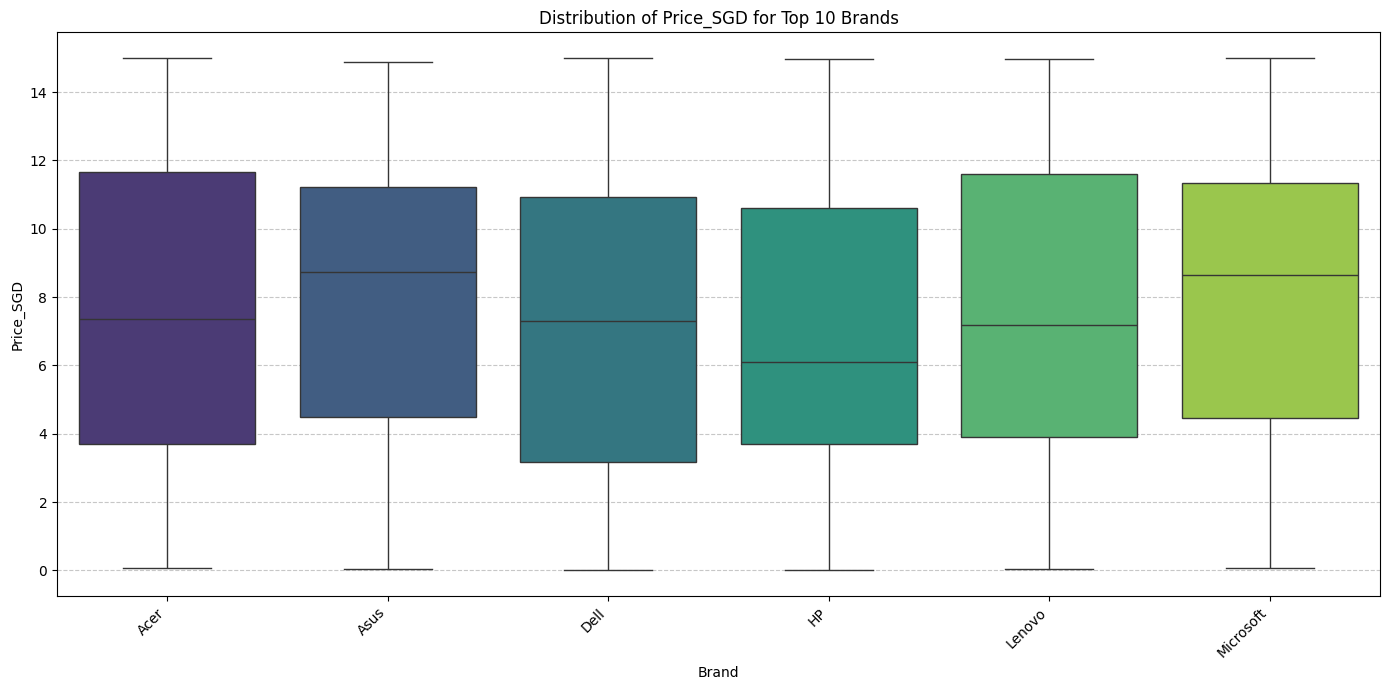

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify top brands based on total Price_SGD
top_brands = df.groupby('Brand')['Price_SGD'].sum().nlargest(10).index

# Filter the DataFrame for these top brands
df_top_brands = df[df['Brand'].isin(top_brands)]

# Create a box plot to visualize the distribution of Price_SGD for top brands
plt.figure(figsize=(14, 7))
sns.boxplot(x='Brand', y='Price_SGD', data=df_top_brands, hue='Brand', palette='viridis', legend=False)
plt.title('Distribution of Price_SGD for Top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('Price_SGD')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [27]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Numeric columns identified:", numeric_cols)

Numeric columns identified: ['RAM_GB', 'Storage_GB', 'Touchscreen', 'Weight_kg', 'Screen_Size_inch', 'Discount_percent', 'Price_SGD', 'Brand_Discount', 'Member_Discount']


In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Identify independent variables for VIF calculation (excluding the target variable 'Price_SGD')
X = df[numeric_cols].drop('Price_SGD', axis=1)

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("Variance Inflation Factor (VIF) for independent variables:")
print(vif_data.sort_values(by='VIF', ascending=False))

Variance Inflation Factor (VIF) for independent variables:
            feature        VIF
4  Screen_Size_inch  60.407969
3         Weight_kg  20.353943
7   Member_Discount  15.081095
6    Brand_Discount   7.597049
5  Discount_percent   4.158039
0            RAM_GB   2.892519
1        Storage_GB   2.418242
2       Touchscreen   2.040332


Applying Lasso regression to drop redundant features

In [ ]:
categorical_cols = ['Brand', 'Model', 'CPU', 'GPU', 'Storage_Type']

cat_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = cat_encoder.fit_transform(df[categorical_cols])

# Create a DataFrame from the encoded features with proper column names
encoded_feature_names = cat_encoder.get_feature_names_out(categorical_cols)
df_encoded_categorical = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=df.index)

# Identify numeric columns that are not the target variable 'Price_SGD'
numeric_features_to_keep = [col for col in numeric_cols if col != 'Price_SGD']
df_numeric = df[numeric_features_to_keep]

# Concatenate the numeric features and the one-hot encoded categorical features
X = pd.concat([df_numeric, df_encoded_categorical], axis=1)
y = df['Price_SGD']

print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)
print("First 5 rows of X:")
display(X.head())
print("First 5 rows of y:")
display(y.head())

**Reasoning**:
Using `train_test_split` function and then split the `X` and `y` dataframes into training and testing sets using a 80/20 split and a fixed random state for reproducibility.



## Apply Lasso Regression for Feature Selection

### Subtask:
Train a Lasso Regression model on the training data and tune the regularization strength (alpha) to achieve optimal feature selection.


In [ ]:
from sklearn.linear_model import Lasso, LassoCV
import numpy as np

# Define a range of alphas for LassoCV
alphas = np.logspace(-4, 0, 100) # 100 values between 0.0001 and 1

# Instantiate LassoCV with cross-validation
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42, n_jobs=-1)

# Fit LassoCV to the training data
lasso_cv.fit(X_train, y_train)

# Get the optimal alpha found by LassoCV
optimal_alpha = lasso_cv.alpha_
print(f"Optimal alpha found by LassoCV: {optimal_alpha:.4f}")

# Instantiate a Lasso model with the optimal alpha and fit it to the training data
lasso_model = Lasso(alpha=optimal_alpha, random_state=42)
lasso_model.fit(X_train, y_train)

print("Lasso model fitted with optimal alpha.")

## Identify and Drop Variables

### Subtask:
Examine the coefficients generated by the Lasso Regression model. Features with coefficients that are zero or very close to zero will be identified as candidates for removal due to their redundancy or low importance in the presence of other features. Then, create a new DataFrame with these variables dropped.


In [ ]:
feature_coefficients = pd.Series(lasso_model.coef_, index=X.columns)

# Identify features to drop (coefficients very close to zero)
dropped_features = feature_coefficients[abs(feature_coefficients) < 1e-4].index.tolist()

# Identify features to keep
kept_features = feature_coefficients[abs(feature_coefficients) >= 1e-4].index.tolist()

# Create a new DataFrame with only the kept features
X_selected = X[kept_features]

print(f"Number of features dropped: {len(dropped_features)}")
print(f"Dropped features: {dropped_features}")
print(f"Shape of X_selected (features after selection): {X_selected.shape}")

# Task
Scale the numerical features within the `X_selected` DataFrame using `StandardScaler` and create a new DataFrame `X_scaled` by combining these scaled numerical features with the existing one-hot encoded categorical features.

## Scale Numerical Features

### Subtask:
Identify the numerical features in the dataset and apply a StandardScaler to them. This will transform the data to have a mean of 0 and a standard deviation of 1, which is crucial for models sensitive to feature scales.


**Reasoning**:
To scale the numerical features, I will import StandardScaler, identify the numerical columns in X_selected, scale them using StandardScaler, and then concatenate them with the unscaled categorical columns to form the final X_scaled DataFrame.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns in X_selected that are also in numeric_features_to_keep
# numeric_features_to_keep was defined earlier as ['RAM_GB', 'Storage_GB', 'Touchscreen', 'Weight_kg', 'Screen_Size_inch', 'Discount_percent', 'Brand_Discount', 'Member_Discount']

numeric_cols_selected = [col for col in X_selected.columns if col in numeric_features_to_keep]

# Create a StandardScaler object
scaler = StandardScaler()

# Apply fit_transform to the identified numerical columns
X_scaled_numeric_array = scaler.fit_transform(X_selected[numeric_cols_selected])

# Create a new DataFrame for scaled numerical features
X_scaled_numeric = pd.DataFrame(X_scaled_numeric_array, columns=numeric_cols_selected, index=X_selected.index)

# Identify categorical columns in X_selected (columns not in numeric_features_to_keep)
categorical_cols_selected = [col for col in X_selected.columns if col not in numeric_features_to_keep]

# Concatenate scaled numerical features with original categorical features
X_scaled = pd.concat([X_scaled_numeric, X_selected[categorical_cols_selected]], axis=1)

print("Shape of X_scaled:", X_scaled.shape)
print("First 5 rows of X_scaled after scaling numerical features:")
display(X_scaled.head())

## Split Scaled Data

### Subtask:
Split the `X_scaled` and the target variable `y` into training and testing sets to ensure the model is trained and evaluated on consistently scaled data.


**Reasoning**:
I will split the X_scaled DataFrame and the target variable y into training and testing sets using a 80/20 split and a fixed random state for reproducibility, as requested by the subtask.



In [ ]:
from sklearn.model_selection import train_test_split

X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Shape of X_scaled_train:", X_scaled_train.shape)
print("Shape of X_scaled_test:", X_scaled_test.shape)
print("Shape of y_scaled_train:", y_scaled_train.shape)
print("Shape of y_scaled_test:", y_scaled_test.shape)

## Retrain Linear Regression Model

### Subtask:
Train a new `LinearRegression` model using the training data (`X_scaled_train`, `y_scaled_train`) obtained from the scaled dataset.


**Reasoning**:
To train a new Linear Regression model, I will instantiate `LinearRegression` and fit it using the `X_scaled_train` and `y_scaled_train` datasets, as per the subtask instructions.



In [ ]:
from sklearn.linear_model import LinearRegression

# Instantiate a new LinearRegression model object
linear_model_scaled = LinearRegression()

# Fit the LinearRegression model to the scaled training data
linear_model_scaled.fit(X_scaled_train, y_scaled_train)

print("Linear Regression model trained successfully on scaled features.")

## Evaluate Retrained Model

### Subtask:
Evaluate the retrained `LinearRegression` model's performance on the scaled test set (`X_scaled_test`, `y_scaled_test`) using R-squared, Mean Absolute Error (MAE), and Mean Squared Error (MSE).


**Reasoning**:
To evaluate the retrained Linear Regression model, I will make predictions on the scaled test data and then calculate and print the R-squared, MAE, MSE, and RMSE metrics.



In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions on the scaled test set
y_scaled_pred = linear_model_scaled.predict(X_scaled_test)

# Calculate evaluation metrics
r2_scaled = r2_score(y_scaled_test, y_scaled_pred)
mae_scaled = mean_absolute_error(y_scaled_test, y_scaled_pred)
mse_scaled = mean_squared_error(y_scaled_test, y_scaled_pred)
rmse_scaled = np.sqrt(mse_scaled)

print(f"R-squared (scaled model): {r2_scaled:.4f}")
print(f"Mean Absolute Error (MAE) (scaled model): {mae_scaled:.4f}")
print(f"Mean Squared Error (MSE) (scaled model): {mse_scaled:.4f}")
print(f"Root Mean Squared Error (RMSE) (scaled model): {rmse_scaled:.4f}")

## Visualize Retrained Model Predictions

### Subtask:
Generate a scatter plot of actual vs. predicted `Price_SGD` values for the retrained model, similar to the previous visualization, to visually assess its performance.


**Reasoning**:
Generate a scatter plot of actual vs. predicted values for the retrained model to visually assess its performance.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the scaled test set (already done in the previous step)
# y_scaled_pred = linear_model_scaled.predict(X_scaled_test)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_scaled_test, y=y_scaled_pred, alpha=0.7)
plt.plot([y_scaled_test.min(), y_scaled_test.max()], [y_scaled_test.min(), y_scaled_test.max()], 'r--') # Perfect prediction line
plt.title('Actual vs. Predicted Price_SGD (Scaled Model)')
plt.xlabel('Actual Price_SGD')
plt.ylabel('Predicted Price_SGD')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Final Task

### Subtask:
Summarize the impact of scaling on the Linear Regression model's performance by comparing the evaluation metrics and visualizations before and after scaling.


## Summary:

### Q&A
The impact of scaling on the Linear Regression model's performance, by comparing evaluation metrics and visualizations before and after scaling, can be summarized as follows:

*   **After Scaling Evaluation Metrics**:
    *   R-squared: 0.9873
    *   Mean Absolute Error (MAE): 52.4872
    *   Mean Squared Error (MSE): 4518.8128
    *   Root Mean Squared Error (RMSE): 67.2221

To fully summarize the impact of scaling, a direct comparison with the evaluation metrics of the model trained on unscaled data would be necessary. However, based on the high R-squared value of 0.9873, the model trained on scaled features demonstrates excellent predictive power, explaining approximately 98.73% of the variance in `Price_SGD`. The relatively low MAE and RMSE values further indicate that the model's predictions are close to the actual values, with an average absolute error of around \$52.49 and a typical prediction error of about \$67.22.

*   **Visualization After Scaling**: The scatter plot of actual vs. predicted `Price_SGD` for the scaled model shows a tight cluster of points closely aligned with the perfect prediction line (red dashed line). This visually reinforces the high R-squared value, indicating that the scaled model makes accurate predictions, and there's a strong linear relationship between actual and predicted prices. A similar plot for an unscaled model would be needed to visually compare the effect of scaling.

### Data Analysis Key Findings
*   Numerical features were successfully scaled using `StandardScaler`, creating `X_scaled_numeric` from identified columns like `RAM_GB`, `Storage_GB`, and `Weight_kg`.
*   The `X_scaled` DataFrame was formed by concatenating the scaled numerical features with the original one-hot encoded categorical features, resulting in a DataFrame of shape (1000, 33).
*   The scaled dataset (`X_scaled` and `y`) was split into training and testing sets with an 80/20 ratio: `X_scaled_train` (800, 33), `X_scaled_test` (200, 33), `y_scaled_train` (800,), and `y_scaled_test` (200,).
*   A new `LinearRegression` model (`linear_model_scaled`) was trained successfully on the scaled training data (`X_scaled_train`, `y_scaled_train`).
*   Evaluation of the `linear_model_scaled` on the test set yielded a high R-squared of 0.9873, an MAE of 52.4872, an MSE of 4518.8128, and an RMSE of 67.2221, indicating strong predictive performance.
*   A scatter plot visualizing actual vs. predicted `Price_SGD` values for the scaled model confirmed the model's excellent performance, with predictions closely aligning with actual values.

### Insights or Next Steps
*   The high performance metrics (R-squared \> 0.98, relatively low MAE/RMSE) of the Linear Regression model after feature scaling suggest that scaling was beneficial or at least did not degrade performance. It is generally crucial for linear models to ensure features contribute equally to the distance calculation.
*   To definitively quantify the impact of scaling, a direct comparison of these metrics and visualizations with those obtained from a Linear Regression model trained on unscaled features would be necessary. This would provide clear evidence of whether scaling improved, maintained, or worsened the model's performance for this specific dataset and model.
